# Анализ продаж компьютерных игр

**Цель проекта:** Выявить закономерности, определяющие успешность игры.

**Выборка:** Исторические данные о выпущенных играх с продажами по регионам.

**Описание данных**

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import matplotlib.ticker as plticker

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Первым этапом необходимо предобработать данные для дальнейшего исследования. В столбцах `Critic_Score`, `User_Score`, `Rating` много пропусков, практически во всех строчках они совпадают. При обработке пропусков необходимо принять решение либо об удалении таких строчек вообще из датасета, если они будут составлять маленький процент от всего объема датасета, либо восстановить их, если это будет возможно, либо поставить значения-замену, если нет возможности восстановить данные.

Также необходимо привести все названия столбцов к нижнему регистру. И заменить типы данных, где это необходимо (в столбцах `Year_of_Release`, `User_Score`).

## Предобработка данных

### Приведение столбцов к нижнему регистру

In [4]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

In [7]:
#напишем цикл, в котором найдем количество пропусков в каждом столбце
for x in data.columns:
    if data[x].isnull().sum() > 0: 
        print(x, ' - ', data[x].isnull().sum(), 'пропусков')
        count = +1

name  -  2 пропусков
year_of_release  -  269 пропусков
genre  -  2 пропусков
critic_score  -  8578 пропусков
user_score  -  6701 пропусков
rating  -  6766 пропусков


In [8]:
#посмотрим пропуски в столбце name
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Такие проупуски лучше удалить, так как у нас нет основной информации о таких данных и они составляют минимальную часть от общего объема данных.

In [9]:
data = data.dropna(subset = ['name'])

In [10]:
#посмотрим, какой процент составляют эти строки от общего датасета
len(data[data['year_of_release'].isnull()]) / len(data)

0.016095255190570215

Такие строки составляют менее 2% от общего числа строк, их лучше удалить для экономии времени.

In [11]:
data = data.dropna(subset = ['year_of_release'])

In [12]:
#посмотрим пропуски в столбце genre
data[data['genre'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Такие строки мы удалили в предыдущих итерациях.

In [13]:
#посмотрим пропуски в столбце critic_score
data[data['critic_score'].isnull()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Судя по первым выведенным значениям пропуски встречаются одновременно в трех столбцах `critic_score`, `user_score` и `rating`. Значений слишком много, чтобы мы могли от них избавиться, они содержат важную информацию для дальнейшего исследования. Восстановить их логически тоже невозможно, поставим заменяющие значения.

In [14]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменим в столбце `rating` пропуски на unknown.

In [15]:
data['rating'] = data['rating'].fillna('unknown')
data['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

**Пояснения к возрастным рейтингам системы ESRB**

`EС` - Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует.

`E` - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. 

`E10+` - Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей.

`T` - Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. 

`M` - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков.

`AO` - Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. 

`RP` - Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

`K-A` - Такой категории еще нет.

Можем заменить категорию `K-A` и `RP` на unknown. Строк с категориями `EC` и `AO` практически нет, можем заменить их на максимально приближенные категории из списка, которые встречаются чаще.

In [16]:
#заменим K-A и RP на unknown
data.loc[data['rating'] == 'K-A', 'rating'] = 'unknown'
data.loc[data['rating'] == 'RP', 'rating'] = 'unknown'

In [17]:
#заменим EC на E
data.loc[data['rating'] == 'EC', 'rating'] = 'E'

In [18]:
#заменим AO на M
data.loc[data['rating'] == 'AO', 'rating'] = 'M'

In [19]:
#проверим значения
data['rating'].value_counts()

unknown    6680
E          3929
T          2905
M          1537
E10+       1393
Name: rating, dtype: int64

Так как мы не можем заменить в столбцах `critic_score` и `user_score` значения на медианные или средние, в столбце `critic_score` поставим значение-замену, например `-1`, а в столбце чтобы точно определить, какие это данные. Потом приведем эти данные к нужному типу.

In [20]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [21]:
#заменим пропуски в столбце critic_score
data['critic_score'] = data['critic_score'].replace(np.NaN, -1)

In [22]:
#проверим, остались ли пропуски
data[data['critic_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [23]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Встречаются и пропуски, и значения 'tbd' - to be determined, то есть оценка еще не определена. Посмотрим, сколько таких значений.

In [24]:
len(data[data['user_score']=='tbd']) / len(data)

0.14449039163220628

Таких значений чуть больше 14% процентов, мы не можем удалить эти строки, так как это может существенно повлиять на дальнейший ход исследования. Поставим вместо этого знаячение замену, как и в случае с пропусками в столбце `critic_score`.

In [25]:
data['user_score'] = data['user_score'].replace('tbd', -1)
data['user_score'] = data['user_score'].replace(np.NaN, -1)

In [26]:
#проверим значения
data[data['user_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Вывод:**

Пропуски везде обработаны. В дальнейшем исследовании оценок критиков и пользователей нужно не забыть удалить заменяющие пропуски значения, чтобы не искажать результаты.

Пропусков в столбцах `critic_score` и `user_score` достаточно много (часто они встречаются в одних и тех же строчках), можем предположить, что эти данные не добавляли в датасеты. Также есть вероятность того, что игры без оценок не широко освещались в медиапространстве либо вообще их выход не был интересен публике.

В столбце `year_of_release` пропуски могли появиться в следствии неправильного занесения данных в датасет. В некоторых играх год указан в названии, по этой причине могли не выносить год в отдельную строку.

### Замена типа данных

Посмотрим еще раз, какие типы данных представлены в датасете после предыдущих итераций.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Заменим тип данных в столбце `year_of_release` на `int64`, а в столбце `user_score` на float64.

In [28]:
data['year_of_release'] = data['year_of_release'].astype('int64')

In [29]:
data['user_score'] = data['user_score'].astype('float64')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Сумма продаж по всем регионам

In [31]:
data['sales_total'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,unknown,28.31


## Исследовательский анализ даннных

### Количество выпускаемых игр в разные годы

В этом шаге необходимо посмотреть, сколько игр выпускалось за разные периоды (по столбцу `year_of_release`), и принять решение - надо ли учитывать данные за каждый год или для исследование будет достаточно данных за последние несколько лет. В принятии решения будем учитывать количество выпущенных игр.

In [32]:
games_years = pd.pivot_table(data, values = 'name', index = 'year_of_release', aggfunc = 'count')
games_years

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


[Text(0.5, 1.0, 'Динамика выпущенных игр по годам'),
 Text(0.5, 0, 'Год выпуска'),
 Text(0, 0.5, 'Количество выпущенных игр')]

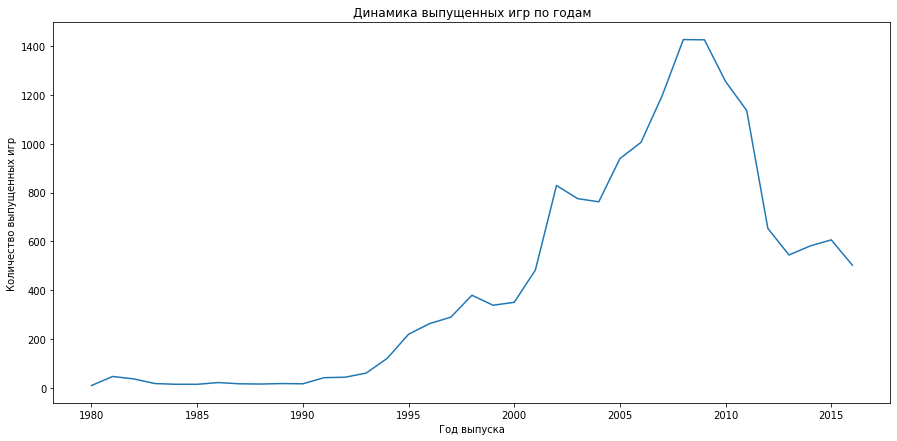

In [33]:
plt.figure(figsize=(15,7))
(sns.lineplot(data = games_years.reset_index(), x = 'year_of_release', y = 'name')
    .set(title = 'Динамика выпущенных игр по годам', xlabel = 'Год выпуска', ylabel = 'Количество выпущенных игр'))

**Вывод:**

Активный рост проданных копий видеоигр наблюдается в промежутке от 2005 до 2010, потом продажи идут на спад. Однако нам нет смысла аналиизировать данные за такой большой период, имеет смысл выделить последние 2-3 года для последующего исследования. Возьмем данные за период с 2014 по 2016. Несмотря на то, что в 2016 продажи идут на спад, данные могут приведены не совсем корректные (тк изначально было условие, что данные приведены неполные).

### Изменение продаж по платформам

На данном этапе проанализируем, как менялись продажи на разных платформах. Отберем платформы с наибольшим суммарными продажами и посмотрим каждую платформу в разрезе годов. Определим жизненный цикл из топ платформ.

In [34]:
sales_platforms = pd.pivot_table(data, values = 'sales_total', index = 'platform', aggfunc = 'sum')
sales_platforms.sort_values(by='sales_total', ascending=False)

,sales_total
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Для последующего анализа возьмем **топ 6 платформ по продажам**, в нашем случае это `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`.

<AxesSubplot:title={'center':'Динамика продаж на платформе PS2 в разрезе годов'}, xlabel='year_of_release'>

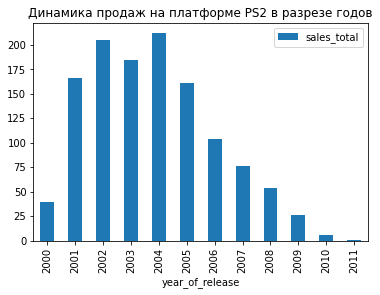

In [35]:
game_ps2 = data.query('platform == "PS2"').pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
game_ps2.plot(kind='bar', title='Динамика продаж на платформе PS2 в разрезе годов')

<AxesSubplot:title={'center':'Динамика продаж на платформе X360 в разрезе годов'}, xlabel='year_of_release'>

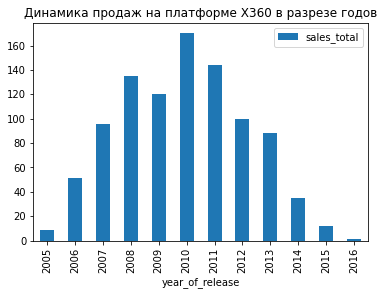

In [36]:
game_x360 = data.query('platform == "X360"').pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
game_x360.plot(kind='bar', title='Динамика продаж на платформе X360 в разрезе годов')

<AxesSubplot:title={'center':'Динамика продаж на платформе PS3 в разрезе годов'}, xlabel='year_of_release'>

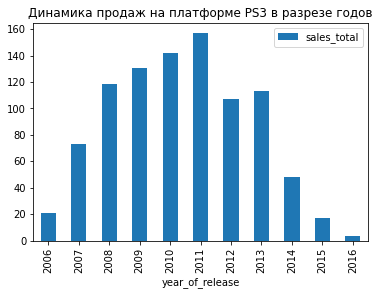

In [37]:
game_ps3 = data.query('platform == "PS3"').pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
game_ps3.plot(kind='bar', title='Динамика продаж на платформе PS3 в разрезе годов')

<AxesSubplot:title={'center':'Динамика продаж на платформе Wii в разрезе годов'}, xlabel='year_of_release'>

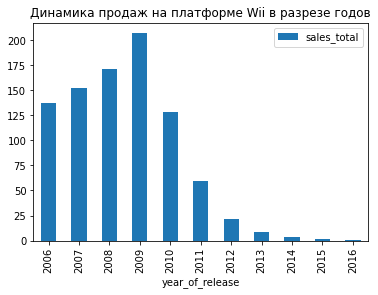

In [38]:
game_wii = data.query('platform == "Wii"').pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
game_wii.plot(kind='bar', title='Динамика продаж на платформе Wii в разрезе годов')

<AxesSubplot:title={'center':'Динамика продаж на платформе DS в разрезе годов'}, xlabel='year_of_release'>

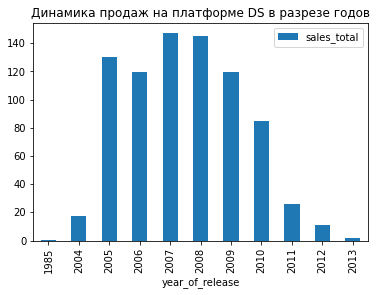

In [39]:
game_ds = data.query('platform == "DS"').pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
game_ds.plot(kind='bar', title='Динамика продаж на платформе DS в разрезе годов')

<AxesSubplot:title={'center':'Динамика продаж на платформе PS в разрезе годов'}, xlabel='year_of_release'>

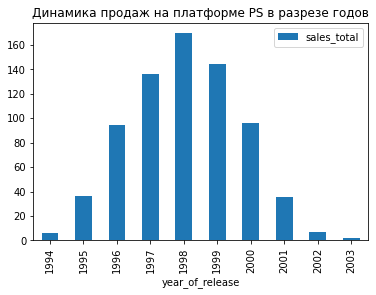

In [40]:
game_ps = data.query('platform == "PS"').pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
game_ps.plot(kind='bar', title='Динамика продаж на платформе PS в разрезе годов')

**Вывод:**
Средний срок жизни платформы колеблется от 10 до 12 лет, как видно из анализа топ 6 платформ.
Активные продажи на платформах наблюдаются в течение 4-5 лет, далее продажи идут на спад.

Несмотря на то, что самые высокие продажи были выделены у 6 основных платформ, на некоторых из них игры уже давно не продаются, поэтому анализировать топ 6 платформ по продажам в дальнейшем анализе не имеет смысла. Необходимо выделить последние 3 года для анализа и уже там смотреть на платформы, на которых высокие продажи.

### Выбираем необходимые данные для исследования

In [41]:
#оставим данные за 2014-2016 годы
data_new = data.query('year_of_release >= 2014')
data_new.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,-1.0,-1.0,unknown,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-1.0,-1.0,unknown,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


### Анализ платформ за акутальный период

          sales_total
platform             
PS4            288.15
XOne           140.36
3DS             86.68
PS3             68.18
X360            48.22
WiiU            42.98
PC              27.05
PSV             22.40
Wii              5.07
PSP              0.36


<AxesSubplot:xlabel='platform'>

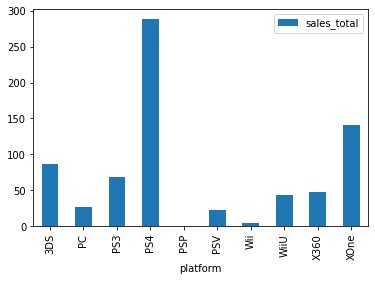

In [42]:
sales_platforms_data_new = pd.pivot_table(data_new, values = 'sales_total', index = 'platform', aggfunc = 'sum')
print(sales_platforms_data_new.sort_values(by='sales_total', ascending=False))
sales_platforms_data_new.plot(kind = 'bar')

Отбросим 4 последние платформы, так как там продажи минимальные. Проанализируем, как меняются продажи по платформам за все периоды и выявим потенциально перспективные.

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


[Text(0.5, 1.0, 'Динамика продаж по топ платформам'),
 Text(0.5, 0, 'Год выпуска'),
 Text(0, 0.5, 'Продажи')]

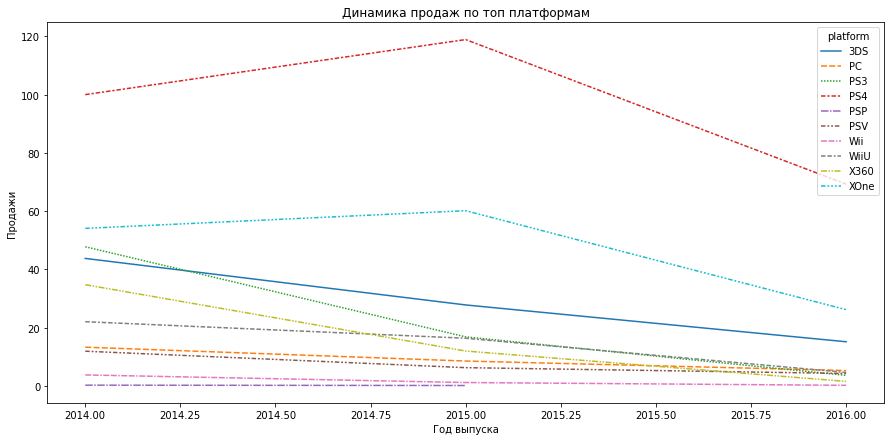

In [43]:
plt.figure(figsize=(15,7))
top_platform_sales = data[data['year_of_release'] >= 2014].pivot_table(index='year_of_release', columns ='platform', values='sales_total', aggfunc='sum')
display(top_platform_sales)
(sns.lineplot(data = top_platform_sales)
    .set(title = 'Динамика продаж по топ платформам', xlabel = 'Год выпуска', ylabel = 'Продажи'))

<AxesSubplot:title={'center':'Динамика продаж на платформе PS4 в разрезе годов'}, xlabel='year_of_release'>

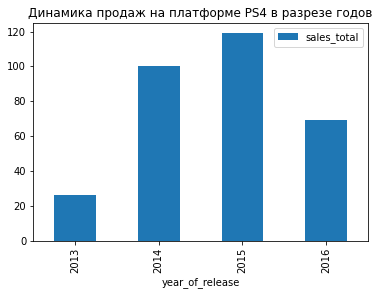

In [44]:
game_PS4 = data.query('platform == "PS4"').pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
game_PS4.plot(kind='bar', title='Динамика продаж на платформе PS4 в разрезе годов')

<AxesSubplot:title={'center':'Динамика продаж на платформе XOne в разрезе годов'}, xlabel='year_of_release'>

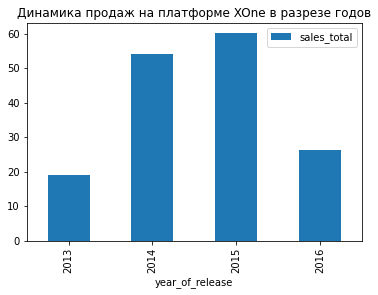

In [45]:
game_XOne = data.query('platform == "XOne"').pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
game_XOne.plot(kind='bar', title='Динамика продаж на платформе XOne в разрезе годов')

<AxesSubplot:title={'center':'Динамика продаж на платформе 3DS в разрезе годов'}, xlabel='year_of_release'>

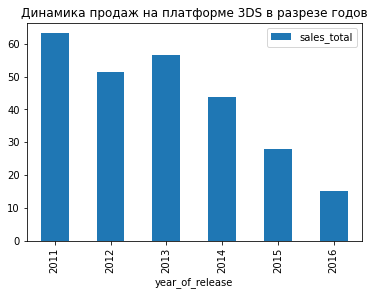

In [46]:
game_3DS = data.query('platform == "3DS"').pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
game_3DS.plot(kind='bar', title='Динамика продаж на платформе 3DS в разрезе годов')

<AxesSubplot:title={'center':'Динамика продаж на платформе PS3 в разрезе годов'}, xlabel='year_of_release'>

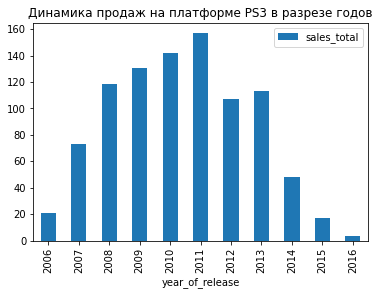

In [47]:
game_PS3 = data.query('platform == "PS3"').pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
game_PS3.plot(kind='bar', title='Динамика продаж на платформе PS3 в разрезе годов')

<AxesSubplot:title={'center':'Динамика продаж на платформе X360 в разрезе годов'}, xlabel='year_of_release'>

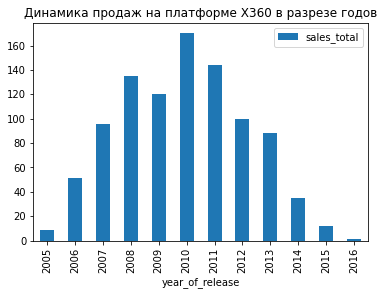

In [48]:
game_X360 = data.query('platform == "X360"').pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
game_X360.plot(kind='bar', title='Динамика продаж на платформе X360 в разрезе годов')

<AxesSubplot:title={'center':'Динамика продаж на платформе WiiU в разрезе годов'}, xlabel='year_of_release'>

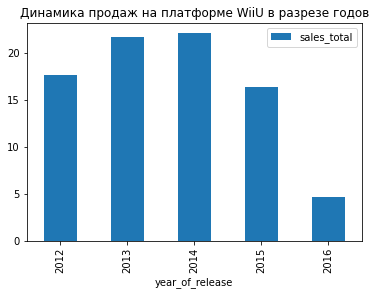

In [49]:
game_WiiU = data.query('platform == "WiiU"').pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
game_WiiU.plot(kind='bar', title='Динамика продаж на платформе WiiU в разрезе годов')

<AxesSubplot:title={'center':'Динамика продаж на платформе PC в разрезе годов'}, xlabel='year_of_release'>

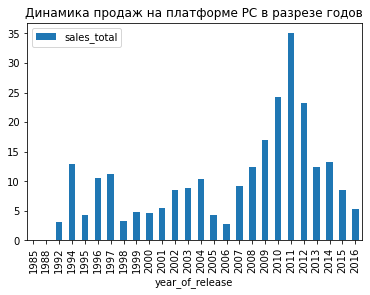

In [50]:
game_PC = data.query('platform == "PC"').pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
game_PC.plot(kind='bar', title='Динамика продаж на платформе PC в разрезе годов')

<AxesSubplot:title={'center':'Динамика продаж на платформе PSV в разрезе годов'}, xlabel='year_of_release'>

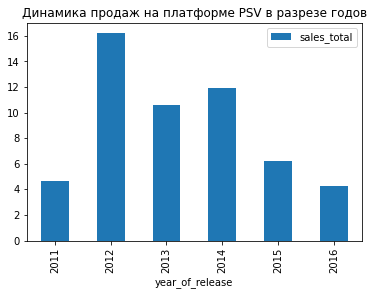

In [51]:
game_PSV = data.query('platform == "PSV"').pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
game_PSV.plot(kind='bar', title='Динамика продаж на платформе PSV в разрезе годов')

<AxesSubplot:title={'center':'Динамика продаж на платформе Wii в разрезе годов'}, xlabel='year_of_release'>

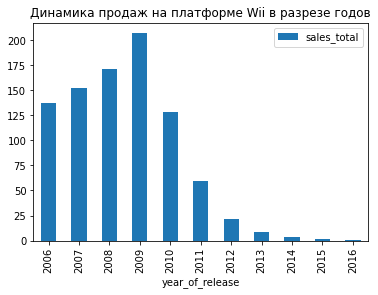

In [52]:
game_Wii = data.query('platform == "Wii"').pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
game_Wii.plot(kind='bar', title='Динамика продаж на платформе Wii в разрезе годов')

<AxesSubplot:title={'center':'Динамика продаж на платформе PSP в разрезе годов'}, xlabel='year_of_release'>

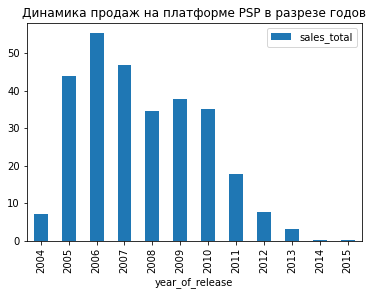

In [53]:
game_PSP = data.query('platform == "PSP"').pivot_table(index='year_of_release', values='sales_total', aggfunc='sum')
game_PSP.plot(kind='bar', title='Динамика продаж на платформе PSP в разрезе годов')

**Вывод:** 
Платформы Wii и PSP принесли за 2014-2016 год маленькие продажи, игры на PSP и Wii не выпускают, поэтому данные платформы нельзя отнести к потенциально прибыльным. на платформах X360 и PS3 продажи существенно падают в последние годы, для дальнейшего анализа их брать не будем.

За потенциально прибыльные платформы выделяем следующие:
- 3DS
- PC
- PS4
- PSV
- WiiU
- XOne

### Выбираем необходимые данные для исследования

In [54]:
data_new = data_new.query('platform != "Wii" and platform != "PSP" and platform != "X360" and platform != "PS3"')
data_new.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,-1.0,-1.0,unknown,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-1.0,-1.0,unknown,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


In [55]:
data_new['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV'], dtype=object)

In [56]:
len(data_new)

1335

### Ящик с усами

[Text(0.5, 1.0, 'Ящик с усами по актуальным платформам'),
 Text(0.5, 0, 'Платформы'),
 Text(0, 0.5, 'Продажи')]

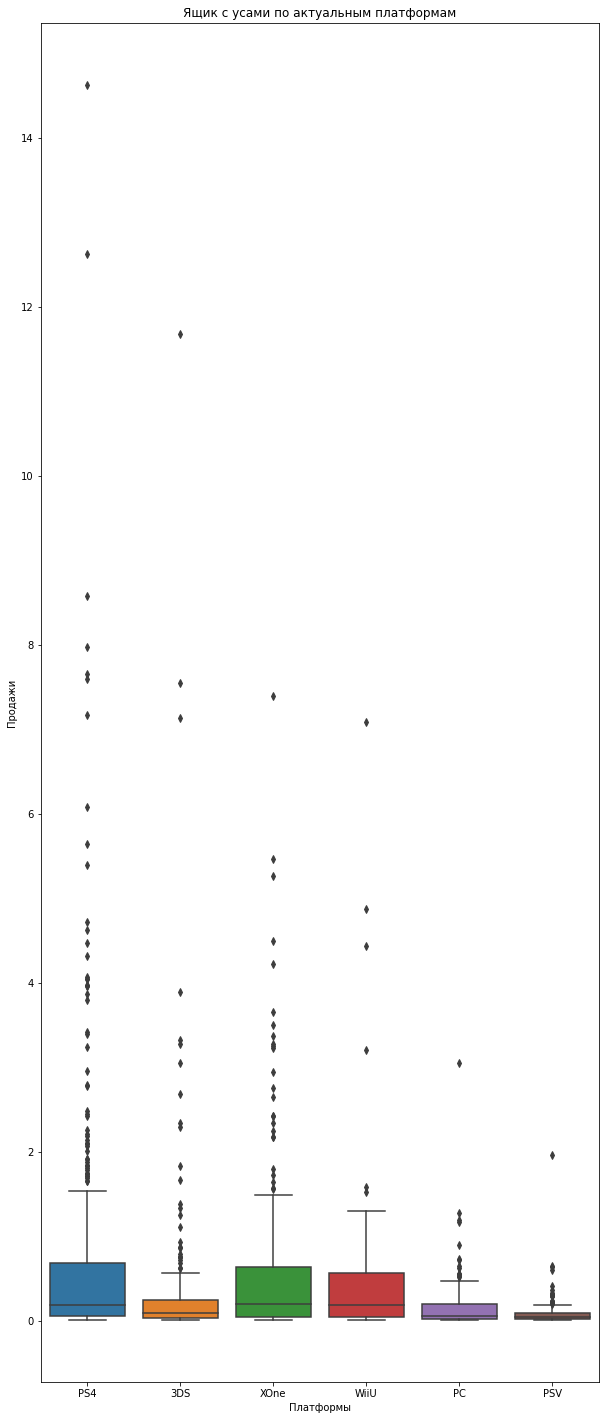

In [57]:
plt.figure(figsize=(10,25))
(sns.boxplot(data = data_new, y = 'sales_total', x='platform')
    .set(title = 'Ящик с усами по актуальным платформам', xlabel = 'Платформы', ylabel = 'Продажи'))

Даже при изменении масштаба графика на нем мало, что можно понять, поэтому обрежем выбросы, чтобы можно было подробнее рассмотреть каждую платформу.

[Text(0.5, 1.0, 'Ящик с усами по актуальным платформам без выбросов'),
 Text(0.5, 0, 'Платформы'),
 Text(0, 0.5, 'Продажи')]

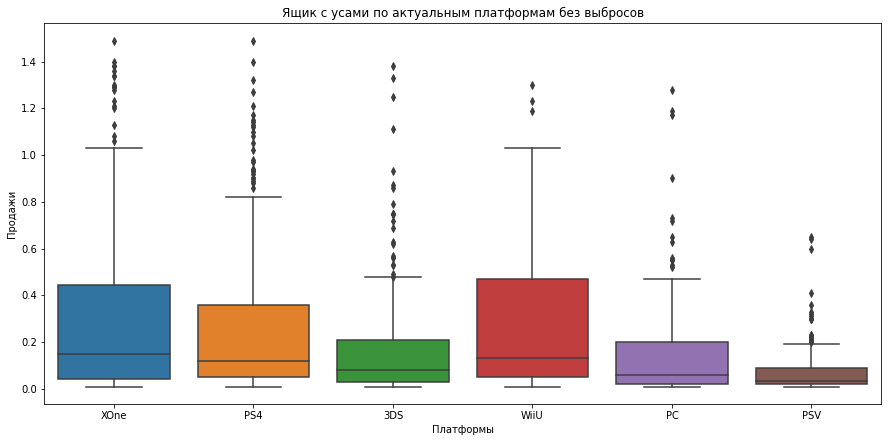

In [58]:
sample = data_new[data_new['sales_total'] < 1.5]

plt.figure(figsize=(15,7))
(sns.boxplot(data = sample, y = 'sales_total', x = 'platform')
    .set(title = 'Ящик с усами по актуальным платформам без выбросов', xlabel = 'Платформы', ylabel = 'Продажи'))

**Выводы:**

Медианные продажи самые высокие на платформах XOne и WiiU, самые низкие на PSV. Это говорит о том, что две самые перспективные платформы это XOne и WiiU, платформа, на которую не стоит делать ставку - PSV.  

### Диаграмма рассеяния и корреляция между отзывами и продажами

В данном шаге нам надо посчитать влияние оценки на платформе (критиков и пользователей) на продажи на платформе. При построении диаграмм рассеяния и выявлении кореляции надо не забыть избавиться от значений, которыми мы заменили пропуски (-1).

In [59]:
data_top_platforms = data_new[data_new['critic_score'] != -1]
data_top_platforms = data_top_platforms[data_top_platforms['user_score'] != -1]

-----------------------
Платформа:  PS4


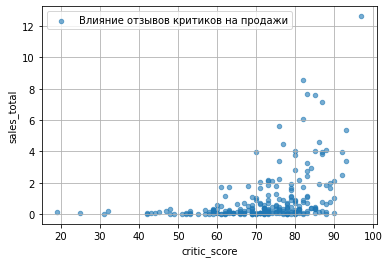

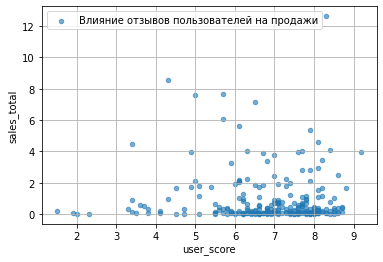

critic_score    0.401903
user_score     -0.043186
sales_total     1.000000
Name: sales_total, dtype: float64
-----------------------
Платформа:  3DS


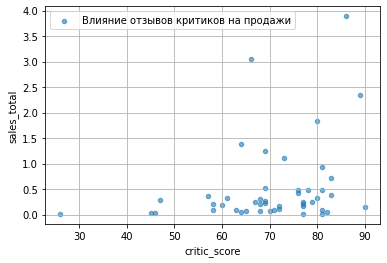

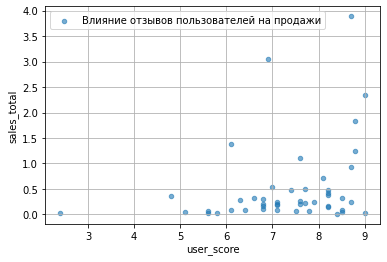

critic_score    0.284686
user_score      0.279850
sales_total     1.000000
Name: sales_total, dtype: float64
-----------------------
Платформа:  XOne


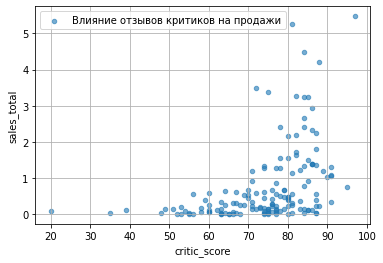

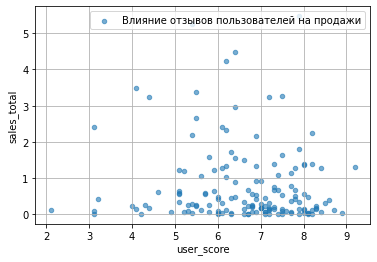

critic_score    0.422112
user_score     -0.091734
sales_total     1.000000
Name: sales_total, dtype: float64
-----------------------
Платформа:  WiiU


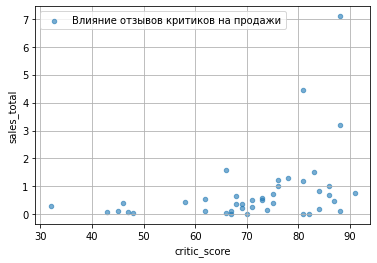

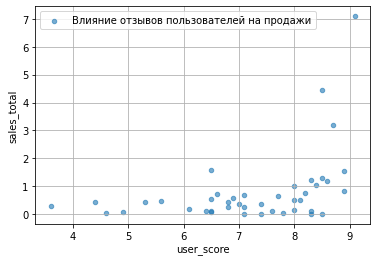

critic_score    0.375640
user_score      0.411451
sales_total     1.000000
Name: sales_total, dtype: float64
-----------------------
Платформа:  PC


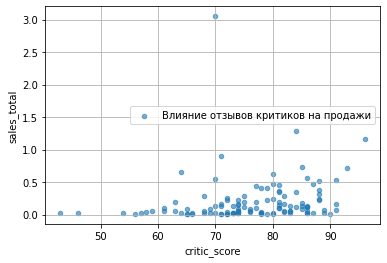

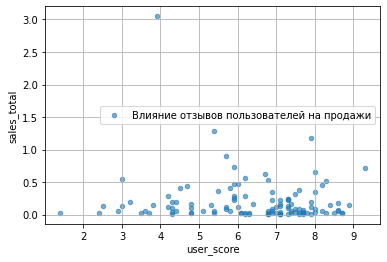

critic_score    0.172061
user_score     -0.089974
sales_total     1.000000
Name: sales_total, dtype: float64
-----------------------
Платформа:  PSV


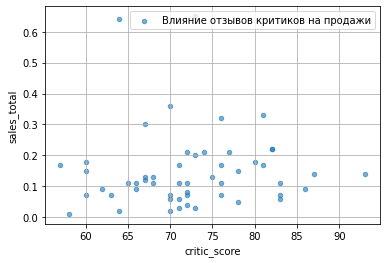

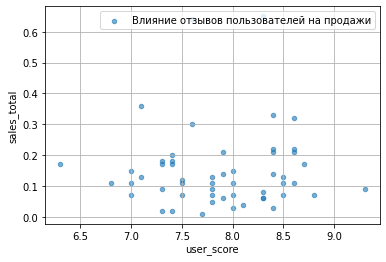

critic_score    0.041029
user_score      0.023528
sales_total     1.000000
Name: sales_total, dtype: float64


In [60]:
#напишем цикл, в котором посмотрим корреляцию оценки критиков и оценки пользователей на продажи
top_platforms = data_new['platform'].unique().tolist()
for platform in top_platforms:
    print('-----------------------')
    print('Платформа: ', platform)
    data_top_platforms[data_top_platforms['platform'] == platform].plot(kind='scatter', x='critic_score', y='sales_total', label = 'Влияние отзывов критиков на продажи', grid = True, alpha = 0.6)
    data_top_platforms[data_top_platforms['platform'] == platform].plot(kind='scatter', x='user_score', y='sales_total', label = 'Влияние отзывов пользователей на продажи', grid = True, alpha = 0.6)
    plt.show()
    print(data_top_platforms[data_top_platforms['platform'] == platform][['critic_score', 'user_score', 'sales_total']].corr()['sales_total'])

**Вывод:**

**PS4:**
Можем выделить умеренное влияние оценки критиков на продажи, тогда как связи между пользовательскими оценками не наблюдается.

**3DS:** 
Зависимость между оценками критиков и пользователей и продажами очень слабая. 

**XOne:** 
Можем выделить умеренное влияние оценки критиков на продажи, тогда как связи между пользовательскими оценками не наблюдается.

**WiiU:**
Можем выделить умеренное влияние оценки критиков и пользовательских оценок на продажи.

**PC:**
Зависимость между оценками критиков и пользователей и продажами очень слабая. 

**PSV:**
Зависимость между оценками критиков и пользователей и продажами очень слабая.

В общем можно сказать, что на продажи на платформах пользовательские оценки практически никак не влиют, тогда как на платформах PS4 и XOne видно умеренное влияние оценки критиков на продажи.

### Распределение игр по жанрам

,sales_total
genre,
Shooter,0.550
Sports,0.200
Platform,0.150
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Misc,0.090
Racing,0.090
Action,0.080


[Text(0.5, 1.0, 'Медианные продажи по жанрам'),
 Text(0.5, 0, 'Платформы'),
 Text(0, 0.5, 'Медианные продажи')]

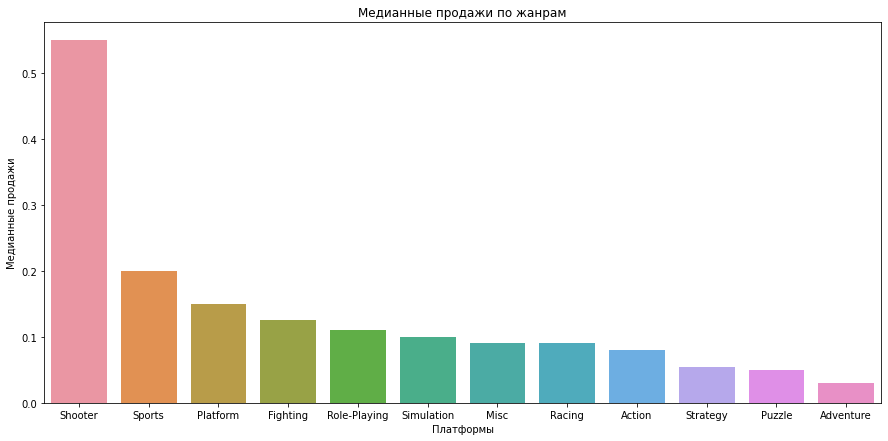

In [61]:
pivot_genres = data_new.pivot_table(index = 'genre', values = 'sales_total', aggfunc='median').sort_values('sales_total', ascending=False)
display(pivot_genres)

plt.figure(figsize=(15, 7))
(sns.barplot(data = pivot_genres, x = pivot_genres.index, y = 'sales_total')
    .set(title = 'Медианные продажи по жанрам', xlabel = 'Платформы', ylabel = 'Медианные продажи'))

**Вывод:**

Самые высокие медианные продажи у жанра Shooter. Также большой популярнойстью пользуются игры жанров Sports, Platform, Fighting, Role-Playing, Simulation. Жанры, которые попали под отметку ниже 0,1 млн в разрезе медианных продаж, не рассматриваем как перспективные.

## Портрет ЦА по регионам

### Топ-5 самых популярных платформ по регионам

In [62]:
top_platform_na = data_new.pivot_table(index = 'platform', values = 'na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
print('Топ платформы в Северной Америке')
display(top_platform_na)
top_platform_eu = data_new.pivot_table(index = 'platform', values = 'eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
print('Топ платформы в Европе')
display(top_platform_eu)
top_platform_jp = data_new.pivot_table(index = 'platform', values = 'jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
print('Топ платформы в Японии')
display(top_platform_jp)

Топ платформы в Северной Америке


,na_sales
platform,
PS4,98.61
XOne,81.27
3DS,22.64
WiiU,19.36
PC,7.23
PSV,2.52


Топ платформы в Европе


,eu_sales
platform,
PS4,130.04
XOne,46.25
PC,17.97
3DS,16.12
WiiU,13.15
PSV,3.53


Топ платформы в Японии


,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
WiiU,7.31
XOne,0.32
PC,0.00


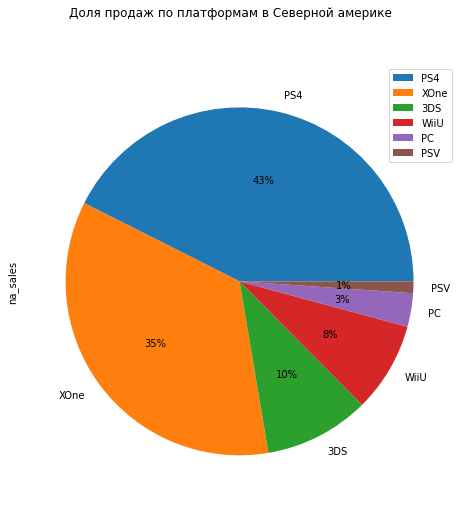

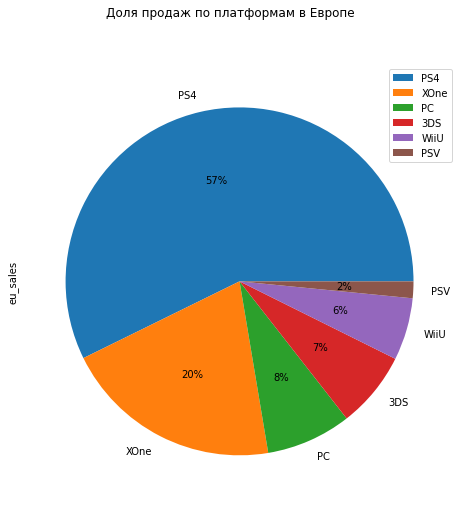

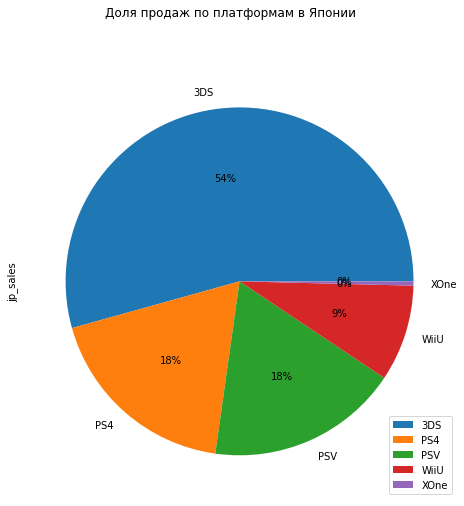

In [63]:
top_platform_na.plot(kind='pie', figsize=(10,8), subplots=True, title='Доля продаж по платформам в Северной америке', autopct='%1.0f%%')
top_platform_eu.plot(kind='pie', figsize=(10,8), subplots=True, title='Доля продаж по платформам в Европе', autopct='%1.0f%%')
top_platform_jp.plot(kind='pie', figsize=(10,8), subplots=True, title='Доля продаж по платформам в Японии', autopct='%1.0f%%')
plt.show()

**Вывод:**

ТОП-5 самых популярных платформ в Северной Америке - PS4, XOne, 3DS, WiiU, PC.

ТОП-5 самых популярных платформ в Европе - PS4, XOne, PС, 3DS, WiiU.

ТОП-5 самых популярных платформ в Японии - 3DS, PS4, PSV, WiiU, XOne. При этом продажи по XOne составляют менее 1%.

### Топ-5 самых популярных жанров по регионам

In [64]:
top_genre_na = data_new.pivot_table(index = 'genre', values = 'na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
print('Топ жанры в Северной Америке')
display(top_genre_na)
top_genre_eu = data_new.pivot_table(index = 'genre', values = 'eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
print('Топ жанры в Европе')
display(top_genre_eu)
top_genre_jp = data_new.pivot_table(index = 'genre', values = 'jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
print('Топ жанры в Японии')
display(top_genre_jp)

Топ жанры в Северной Америке


,na_sales
genre,
Shooter,66.29
Action,60.16
Sports,31.96
Role-Playing,29.74
Fighting,11.23
Misc,10.26
Racing,7.72
Platform,6.45
Adventure,3.92


Топ жанры в Европе


,eu_sales
genre,
Action,63.49
Shooter,56.23
Sports,33.48
Role-Playing,25.94
Racing,12.92
Misc,8.38
Simulation,6.97
Platform,6.35
Fighting,6.03


Топ жанры в Японии


,jp_sales
genre,
Role-Playing,28.70
Action,24.71
Misc,5.17
Fighting,5.01
Shooter,4.21
Adventure,3.18
Platform,2.67
Simulation,2.29
Sports,2.07


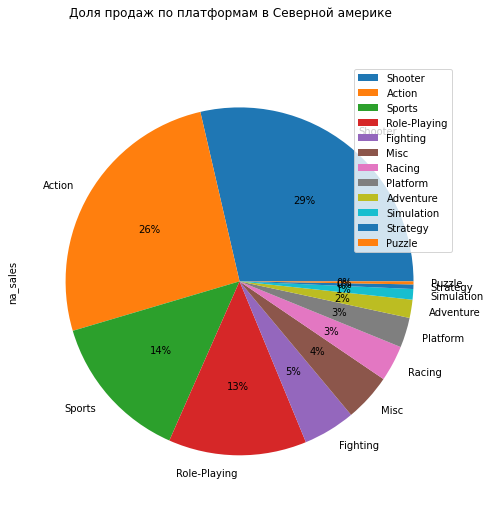

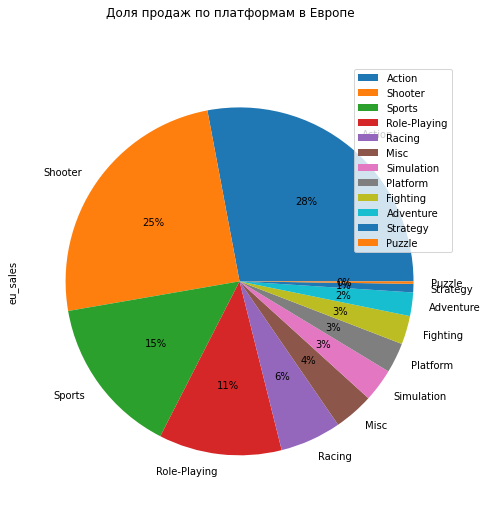

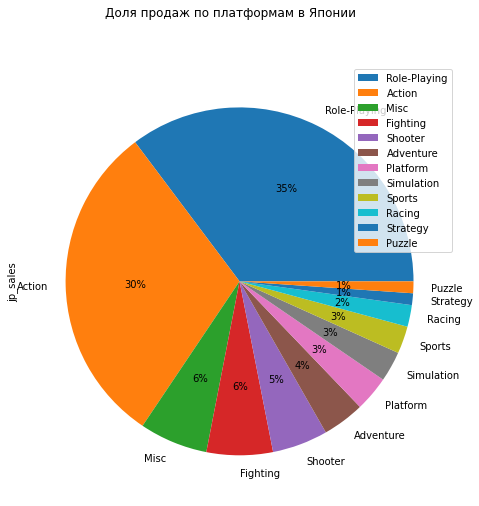

In [65]:
top_genre_na.plot(kind='pie', figsize=(10,8), subplots=True, title='Доля продаж по платформам в Северной америке', autopct='%1.0f%%')
top_genre_eu.plot(kind='pie', figsize=(10,8), subplots=True, title='Доля продаж по платформам в Европе', autopct='%1.0f%%')
top_genre_jp.plot(kind='pie', figsize=(10,8), subplots=True, title='Доля продаж по платформам в Японии', autopct='%1.0f%%')
plt.show()

**Вывод:**

ТОП-5 самых популярных жанров в Северной Америке - Shooter, Action, Sports,	Role-Playing, Fighting.

ТОП-5 самых популярных жанров в Европе - Action, Shooter, Sports, Role-Playing, Racing.

ТОП-5 самых популярных жанров в Японии - Role-Playing, Action, Misc, Fighting, Shooter.

На всех рынках топ-5 самых популярных жанров составляют более 80% продаж. Следовательно на них и должен идти упор в последующие годы.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [66]:
sales_rating_na = data_new.pivot_table(index = 'rating', values = 'na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
print('Влияние рейтинга ESRB на продажи в Северной Америке')
display(sales_rating_na)
sales_rating_eu = data_new.pivot_table(index = 'rating', values = 'eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
print('Влияние рейтинга ESRB на продажи в Европе')
display(sales_rating_eu)
sales_rating_jp = data_new.pivot_table(index = 'rating', values = 'jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
print('Влияние рейтинга ESRB на продажи в Японии')
display(sales_rating_jp)

Влияние рейтинга ESRB на продажи в Северной Америке


,na_sales
rating,
M,82.23
unknown,55.76
E,37.65
T,32.46
E10+,23.53


Влияние рейтинга ESRB на продажи в Европе


,eu_sales
rating,
M,82.38
unknown,50.80
E,45.90
T,30.09
E10+,17.89


Влияние рейтинга ESRB на продажи в Японии


,jp_sales
rating,
unknown,50.43
T,11.99
E,8.29
M,6.40
E10+,4.32


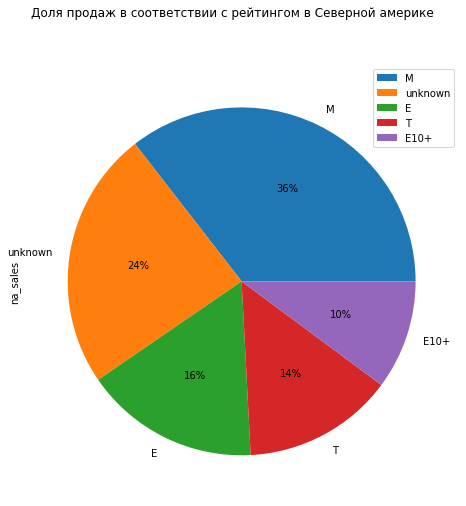

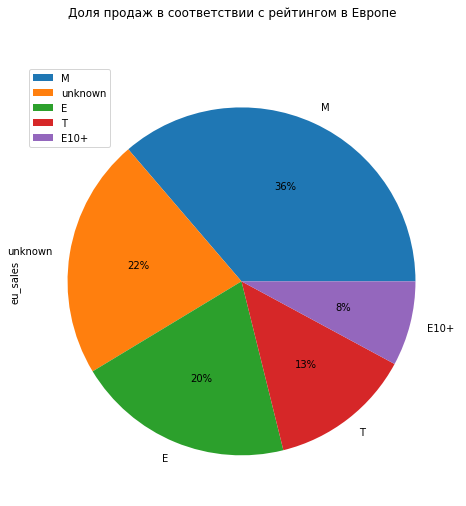

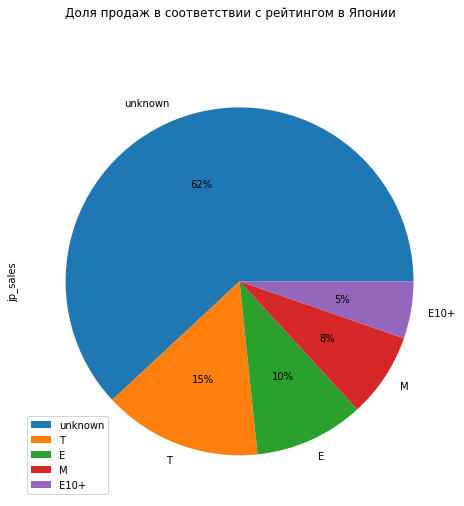

In [67]:
sales_rating_na.plot(kind='pie', figsize=(10,8), subplots=True, title='Доля продаж в соответствии с рейтингом в Северной америке', autopct='%1.0f%%')
sales_rating_eu.plot(kind='pie', figsize=(10,8), subplots=True, title='Доля продаж в соответствии с рейтингом в Европе', autopct='%1.0f%%')
sales_rating_jp.plot(kind='pie', figsize=(10,8), subplots=True, title='Доля продаж в соответствии с рейтингом в Японии', autopct='%1.0f%%')
plt.show()

**Вывод:**

В Северной Америке и Европе продажи игр в зависимости от рейтинга ESRB схожи, тогда как в Японии ситуация другая.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы.

**H0:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**H1:** Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [68]:
#возьмем датасет, в котором нет выбросов - data_top_platforms

XOne_user_score = data_top_platforms.query('platform == "XOne"')['user_score'].mean()
print('Cредний пользовательский рейтинг платформы Xbox One:', XOne_user_score.round(2))
PC_user_score = data_top_platforms.query('platform == "PC"')['user_score'].mean()
print('Cредний пользовательский рейтинг платформы PC:', PC_user_score.round(2))

#проверим гипотезу
xone = data_top_platforms.query('platform == "XOne"')['user_score']
pc = data_top_platforms.query('platform == "PC"')['user_score']

results = st.ttest_ind(
    xone, 
    pc,
    equal_var = False)

alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Cредний пользовательский рейтинг платформы Xbox One: 6.62
Cредний пользовательский рейтинг платформы PC: 6.34
p-значение: 0.1403785186826978
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Несмотря на то, что средние значения пользовательского рейтинга у платформ различаются, отвергнуть нулевую гипотезу мы не можем. 

Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 13%, хотя средний пользовательский рейтинг на разных платформах не одинаков. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками.

### Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую и альтернативную гипотезы.

**H0:** Средние пользовательские рейтинги жанров Action и Sports одинаковые.

**H1:** Средние пользовательские рейтинги жанров Action и Sports разные. Средние пользовательские рейтинги жанров Action и Sports одинаковые.

In [69]:
#возьмем датасет, в котором нет выбросов - data_top_platforms

action_user_score = data_top_platforms.query('genre == "Action"')['user_score'].mean()
print('Cредний пользовательский рейтинг жанра Action:', action_user_score.round(2))
sports_user_score = data_top_platforms.query('genre == "Sports"')['user_score'].mean()
print('Cредний пользовательский рейтинг жанра Sports:', sports_user_score.round(2))

#проверим гипотезу
action = data_top_platforms.query('genre == "Action"')['user_score']
sports = data_top_platforms.query('genre == "Sports"')['user_score']

results = st.ttest_ind(
    action, 
    sports,
    equal_var = False)

alpha = 0.05
output="{:.9f}".format(results.pvalue)

print('p-значение:', output)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Cредний пользовательский рейтинг жанра Action: 6.85
Cредний пользовательский рейтинг жанра Sports: 5.74
p-значение: 0.000000064
Отвергаем нулевую гипотезу


**Вывод:**

В данном случае необходимо отвергнуть нулевую гипотезу.

В качестве нулевой гипотезы было выбрано утверждение, которое указывает на схожесть рейтингов, так как обычно нулевая гипотеза задается, исходя из утверждения что две сущности одинаковые или равны. Гипотеза H1 обратна ей.

**Общий вывод:**

В качестве метода для проверки обеих гипотез был выбран `t-тест`. Метод `scipy.stats.ttest_1samp()` возвращает два числа: статистику разности и уровень значимости для этой статистики — p-value. С помощью p-value (возвращается двусторонней) мы можем сделать определиться отвергать ли нулевую гипотезу или нет, сравнив это значение с выбранным уровнем значимости. 

Если p-value больше 10%, то нулевую гипотезу точно не нужно отвергать. Меньше — возможно, стоит. Мы приняли за пороговое значение 5%.

Чаще всего критерий Стьюдента применяется для проверки равенства средних значений в двух выборках.

## Общий вывод

Для исследования был выбран актуальный период **2014-2016 гг**, так как они могут наиболее точно отобразить актуальный тренд продажи игр на платформах и предпочтения потребителей. Это поможет точнее предсказать ситуацию на рынке видеоигр в 2017 году.

Средний срок жизни платформы колеблется от **10 до 12 лет**, как видно из анализа топ 6 платформ. Активные продажи на платформах наблюдаются в течение **4-5 лет** обычно после первых двух лет жизни платформы, далее продажи идут на спад.

**Потенциально прибыльными платформами за 2014-2016 гг глобально по всем рынкам можно считать платформы:**
* 3DS
* PC
* PS4
* PSV
* WiiU
* XOne

Медианные продажи самые высокие на платформах XOne и WiiU, самые низкие на PSV. Это говорит о том, что две самые перспективные платформы это XOne и WiiU, платформа, на которую не стоит делать ставку - PSV.

В общем можно сказать, что на продажи на платформах пользовательские оценки практически никак не влиют, тогда как на платформах PS4 и XOne видно умеренное влияние оценки критиков на продажи.

Глобально Самые высокие медианные продажи у жанра Shooter. Также большой популярнойстью пользуются игры жанров Sports, Platform, Fighting, Role-Playing, Simulation. Жанры, которые попали под отметку ниже 0,1 млн в разрезе медианных продаж, не рассматриваем как перспективные.

**Северная Америка**

Самую большую долу на рынке занимают игры выпускаемые на PS4 (43%), второе место занимает XOne (35%), далее идет 3DS (10%). Эти платформы занимают практически 90% всего рынка.

Лидирующие жанры по продажам – Shooter, Action, Sports, Role-Playing, Fighting.

Если рассматривать с точки зрения рейтинга ESRB, игры с самыми высокими продажами имеют отметку M, далее идут E, T, E10+. Схожая ситуация и на европейском рынке.

**Европа**

Самую большую долу на рынке занимают игры выпускаемые на PS4 (57%), второе место занимает XOne (20%), далее идет PC (8%). Эти платформы занимают 85% всего рынка.

Лидирующие жанры по продажам – Action, Shooter, Sports, Role-Playing, Racing.

Если рассматривать с точки зрения рейтинга ESRB, игры с самыми высокими продажами имеют отметку M, далее идут E, T, E10+. Схожая ситуация и на рынке Северной Америки.

**Япония**

Самую большую долу на рынке занимают игры выпускаемые на 3DS (54%), второе место занимает PS4 (18%), далее идет PSV (18%). Эти платформы занимают 90% всего рынка.

Лидирующие жанры по продажам – Role-Playing, Action, Misc, Fighting, Shooter.

Если рассматривать с точки зрения рейтинга ESRB, игры с самыми высокими продажами имеют отметку T, далее идут E, M, E10+.

Можно сказать, что рынок Северной Америки и Европы очень похожи, тогда как японский рынок очень сильно отличается. Следует учитывать это при выборе маркетинговой стратегии.

В ходе исследования были проверены две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Первую гипотезу мы не можем опровергнуть. Вторую гипотезу опровергаем.